In [49]:
import matplotlib.pyplot as plt
import numpy as np
from math import pow
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from numpy.linalg import inv
%matplotlib inline

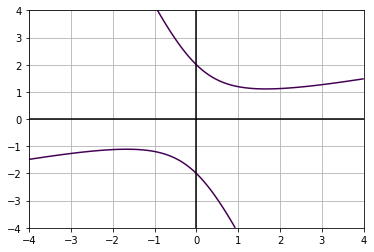

In [2]:
## 2-D plot
fig, ax = plt.subplots()
t = 4
y, x = np.ogrid[-t:t:100j, -t:t:100j]
plt.contour(x.ravel(), y.ravel(), x**2 -y**2 + 4 -3*x*y, [0])
plt.grid()
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.show()

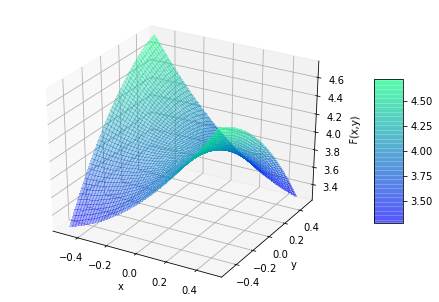

In [61]:
# 3-D plot
def f(x,y):
    func = x**2 -y**2 + 4 - 3*x*y
    return func

t = 0.5
step = 0.01
x = np.arange(-t,t,step)
y = np.arange(-t,t,step)
X,Y = np.meshgrid(x,y)


zs = np.array(f(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

fig = plt.figure()
ax = Axes3D(fig)

# Plot a 3D surface
surf = ax.plot_surface(X, Y, Z, alpha=0.3, cmap='winter', linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('F(x,y)')
plt.show()


Critical point (x, y): (-0.300000, 0.300000)
Critical point (x, y): (0.000000, 0.000000)
Critical point (x, y): (0.000000, 0.000000)
Critical point (x, y): (0.000000, 0.000000)
Critical point (x, y): (0.000000, 0.000000)


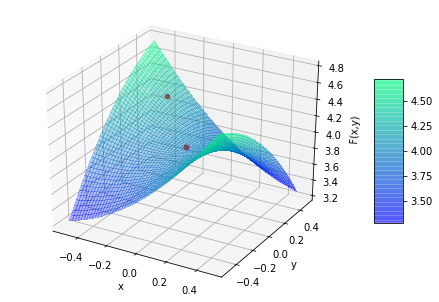

In [63]:
fig = plt.figure()
ax = Axes3D(fig)
# ax.plot_surface(X, Y, Z, alpha=0.3)

def f(x, y): 
    return x**2 - y**2 + 4 - 3*x*y

def delta(x, y): 
    delta = np.array([[2*x-3*y], [-2*y-3*x]])
    return delta

def hessian_inv(x, y): 
    H = np.matrix([[2, -3], [-3, -2]])
    H_inv = inv(H)
    return H_inv

x = -0.3
y = 0.3
np.set_printoptions(precision=2)

#Learning rate 
epsilon=1

for i in range(5):
    ax.scatter(x,y, f(x,y), color = 'r')
    print ( "Critical point (x, y): (%.6f, %.6f)"%(x, y))
    J = delta(x,y)
#     print ( "J(x, y): (%.6f, %.6f)"%(J[0,0], J[1,0]))
    init = np.asarray([x, y]).reshape(2,1)
    vec =  init - epsilon * np.matmul(hessian_inv(x,y), J)
    x = vec[0,0]
    y = vec[1,0]
    
surf = ax.plot_surface(X, Y, Z, alpha=0.3, cmap='winter', linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('F(x,y)')
plt.show()

In [ ]:
# def f( x ): 
#     return x*x+x*x*x+pow(x, 4) 

# def fp( x ): 
#     return 2*x+3*x*x+4*pow(x, 3) 

# def fpp( x ): 
#     return 2+6*x+12*pow(x, 2) 

# # Initial point 
# x=5.6
# #Learning rate 
# alpha=1

# for i in range(0, 30): 
#     print ( "x: ", x, " f(x): ", f(x), " J(x): ", fp(x)) 
#     x = x - alpha * fp(x)/fpp(x) 